In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import OneClassSVM
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

%matplotlib inline
pd.options.mode.chained_assignment = None

In [80]:
def train_test(df):
    ''' on utilise year == 2022 pour constituer le dataset de test'''
    
    train = df.iloc[60000:108952]
    test =  df.iloc[108953:]
    
    return train, test

In [96]:
def rf_modelisation(x_train, y_train):
    ''' determination des hyperparametre de RF'''
    weights = np.linspace(0.1,0.9,100)
    params = [{
        "n_estimators": [10, 100,150],
        "max_features": [2, 4, 8,10,12],
        "class_weight":[{0:x, 1:1.0-x} for x in weights]
        }]

    rfCV = GridSearchCV(
        RandomForestClassifier(),
        params,
        scoring="recall",
        cv=3,
        n_jobs=-1,
        return_train_score=True)
    
    rfCV = rfCV.fit(x_train, y_train)
    
    return rfCV.best_estimator_

#
def logist_modelisation(x_train, y_train):
    # grille de valeurs
    weights = np.linspace(0.1,0.9,100)

    params = [{"C": [0.01, 0.2, 0.5, 1, 5, 10, 20],
           #"penalty": ["l1", "l2"],
           "class_weight":[{0:x, 1:1.0-x} for x in weights]
          }]

    logitCV = GridSearchCV(
        LogisticRegression(),
        params,
        scoring="recall",
        cv=3,
        n_jobs=-1,
        return_train_score=True)
    
    logitCV = logitCV.fit(x_train, y_train)
    
    return logitCV.best_estimator_

#
def OneSVM_modelisation(x_train, y_train):
    # grille de valeurs

    params = [{"nu": [0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.9], 
              'max_iter': [100,250, 500, 700, 900],
           #"class_weight":[{0:x, 1:1.0-x} for x in weights]
          }]

    outlierCV = GridSearchCV(
        OneClassSVM(),
        params,
        scoring="recall",
        cv=3,
        n_jobs=-1,
        return_train_score=True)
    
    outlierCV = outlierCV.fit(x_train, y_train)
    
    
    return outlierCV.best_estimator_

def DT_modelisation(x_train, y_train):
    # grille de valeurs
    weights = np.linspace(0.1,0.9,100)

    params = [{
        "max_depth": [3, 5, 10, 15,None],
        "min_samples_split": [2, 5, 10,15,20,30],
        "min_samples_leaf": [1, 2, 5,10,30,50],
        "class_weight":[{0:x, 1:1.0-x} for x in weights]
        }]

    dtCV = GridSearchCV(
        DecisionTreeClassifier(),
        params,
        scoring="recall",
        cv=3,
        n_jobs=-1,
        return_train_score=True)
    
    dtCV = dtCV.fit(x_train, y_train)
    
    return dtCV.best_estimator_
  

In [90]:
# Chargement des données
data = pd.read_csv("data/all_features.csv", sep=';',low_memory=False)
label = pd.read_csv("data/descriptif_hiver_ete.csv", sep=';',low_memory=False)
print(len(data))


# definition de train et test 
# definition de x et y 
x_train, x_test = train_test(data.iloc[:,1:])
train_target,test_target = train_test(label)
y_test = test_target['baignade']
y_train = train_target['baignade']


111482


In [100]:
print(len(x_train))
print(len(x_test))

48952
2529


In [101]:
x_test

,CE_NCC_0 Arrêt,CE_NCC_1 Marche,CE_chauffage_-1 Arrêt Sécurité,CE_chauffage_-2 Arrêt Manuel OFF,CE_chauffage_1 Marche AUTO,CE_electrolyseur_-5 Arrêt pas de flux,CE_electrolyseur_0 Arrêt,CE_electrolyseur_1 Marche 100%,CE_filtration_-3 Arrêt pause filtration,CE_filtration_0 Arrêt AUTO,...,CE_pompe_chauff_-1 Arrêt Sécurité,CE_pompe_chauff_0 Arrêt AUTO,CE_pompe_chauff_1 Marche AUTO,CE_trait_PH_-5 Arrêt pas de flux chambre analyse,CE_trait_PH_0 Arrêt AUTO,CE_trait_PH_2 En cours pompe active,CE_volet_0 Position ouvert,CE_volet_1 position fermé,airTemp,waterTemp
108953,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,1,30.515213,27.854603
108954,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,1,30.515213,27.854603
108955,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,1,30.515213,27.854603
108956,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,1,30.515213,27.854603
108957,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,1,30.515213,27.854603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111477,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,26.104221,23.575230
111478,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,26.104221,23.575230
111479,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,26.104221,23.575230
111480,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,26.104221,23.575230


In [97]:
## Logistic Regression
model_logist = logist_modelisation(x_train, y_train)
model_logist

LogisticRegression(C=0.01, class_weight={0: 0.1, 1: 0.9})

In [92]:
## decision tree
model_dt = DT_modelisation(x_train, y_train)
model_dt


DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, max_depth=10)

In [81]:


## Random forest
model_rf = rf_modelisation(x_train, y_train)
model_rf



RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=8,
                       n_estimators=10)

In [106]:
import joblib
joblib.dump(model_dt, "saved_models/decision_tree2.joblib")
joblib.dump(model_rf, "saved_models/random_forest2.joblib")
joblib.dump(model_logist, "saved_models/reg_logist2.joblib")

['saved_models/reg_logist2.joblib']

# Evaluation

In [82]:

## RF
model_rf.fit(x_train, y_train)

# prediction
y_train_predict = model_rf.predict(x_train)
y_test_predict = model_rf.predict(x_test)

# Evaluation
print("-----------------------Training data-----------------------")
print(classification_report(y_train, y_train_predict))
print("-------------------------Test data-------------------------")
print(classification_report(y_test, y_test_predict))

-----------------------Training data-----------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     46559
           1       0.43      0.98      0.60       393

    accuracy                           0.99     46952
   macro avg       0.71      0.99      0.80     46952
weighted avg       1.00      0.99      0.99     46952

-------------------------Test data-------------------------
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      3976
           1       0.68      0.05      0.09       553

    accuracy                           0.88      4529
   macro avg       0.78      0.52      0.51      4529
weighted avg       0.86      0.88      0.83      4529



In [98]:
model_logist.fit(x_train, y_train)

# prediction
y_train_predict = model_logist.predict(x_train)
y_test_predict = model_logist.predict(x_test)

# Evaluation
print("-----------------------Training data-----------------------")
print(classification_report(y_train, y_train_predict))
print("-------------------------Test data-------------------------")
print(classification_report(y_test, y_test_predict))

-----------------------Training data-----------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     48404
           1       0.00      0.00      0.00       548

    accuracy                           0.98     48952
   macro avg       0.49      0.50      0.50     48952
weighted avg       0.98      0.98      0.98     48952

-------------------------Test data-------------------------
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      2131
           1       0.34      0.27      0.30       398

    accuracy                           0.80      2529
   macro avg       0.60      0.59      0.59      2529
weighted avg       0.79      0.80      0.79      2529



In [78]:
model_logist.fit(x_train, y_train)

# prediction
y_train_predict = model_logist.predict(x_train)
y_test_predict = model_logist.predict(x_test)

# Evaluation
print("-----------------------Training data-----------------------")
print(classification_report(y_train, y_train_predict))
print("-------------------------Test data-------------------------")
print(classification_report(y_test, y_test_predict))

-----------------------Training data-----------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     46559
           1       0.12      0.16      0.14       393

    accuracy                           0.98     46952
   macro avg       0.56      0.57      0.56     46952
weighted avg       0.99      0.98      0.98     46952

-------------------------Test data-------------------------
              precision    recall  f1-score   support

           0       0.89      0.96      0.93      3976
           1       0.37      0.17      0.23       553

    accuracy                           0.86      4529
   macro avg       0.63      0.56      0.58      4529
weighted avg       0.83      0.86      0.84      4529



In [63]:
model_dt.fit(x_train, y_train)

# prediction
y_train_predict = model_dt.predict(x_train)
y_test_predict = model_dt.predict(x_test)

# Evaluation
print("-----------------------Training data-----------------------")
print(classification_report(y_train, y_train_predict))
print("-------------------------Test data-------------------------")
print(classification_report(y_test, y_test_predict))

-----------------------Training data-----------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    106559
           1       0.74      0.10      0.17       393

    accuracy                           1.00    106952
   macro avg       0.87      0.55      0.59    106952
weighted avg       1.00      1.00      1.00    106952

-------------------------Test data-------------------------
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      3976
           1       0.00      0.00      0.00       553

    accuracy                           0.88      4529
   macro avg       0.44      0.50      0.47      4529
weighted avg       0.77      0.88      0.82      4529



c:\Users\FABDELLI\python\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\FABDELLI\python\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\FABDELLI\python\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [93]:
model_dt.fit(x_train, y_train)

# prediction
y_train_predict = model_dt.predict(x_train)
y_test_predict = model_dt.predict(x_test)

# Evaluation
print("-----------------------Training data-----------------------")
print(classification_report(y_train, y_train_predict))
print("-------------------------Test data-------------------------")
print(classification_report(y_test, y_test_predict))

-----------------------Training data-----------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     48404
           1       0.26      0.98      0.41       548

    accuracy                           0.97     48952
   macro avg       0.63      0.98      0.70     48952
weighted avg       0.99      0.97      0.98     48952

-------------------------Test data-------------------------
              precision    recall  f1-score   support

           0       0.84      0.98      0.90      2131
           1       0.02      0.00      0.00       398

    accuracy                           0.82      2529
   macro avg       0.43      0.49      0.45      2529
weighted avg       0.71      0.82      0.76      2529



In [105]:

df = x_test
df['true_label'] = y_test
df['predicted_label'] = y_test_predict
df

,CE_NCC_0 Arrêt,CE_NCC_1 Marche,CE_chauffage_-1 Arrêt Sécurité,CE_chauffage_-2 Arrêt Manuel OFF,CE_chauffage_1 Marche AUTO,CE_electrolyseur_-5 Arrêt pas de flux,CE_electrolyseur_0 Arrêt,CE_electrolyseur_1 Marche 100%,CE_filtration_-3 Arrêt pause filtration,CE_filtration_0 Arrêt AUTO,...,CE_pompe_chauff_1 Marche AUTO,CE_trait_PH_-5 Arrêt pas de flux chambre analyse,CE_trait_PH_0 Arrêt AUTO,CE_trait_PH_2 En cours pompe active,CE_volet_0 Position ouvert,CE_volet_1 position fermé,airTemp,waterTemp,true_label,predicted_label
108953,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,1,30.515213,27.854603,0,0
108954,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,1,30.515213,27.854603,0,0
108955,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,1,30.515213,27.854603,0,0
108956,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,1,30.515213,27.854603,0,0
108957,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,1,30.515213,27.854603,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111477,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,26.104221,23.575230,0,0
111478,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,26.104221,23.575230,0,0
111479,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,26.104221,23.575230,0,0
111480,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,26.104221,23.575230,0,0


In [65]:
from sklearn import metrics
def roc_curves_plot(y_train, pred_proba_train, y_test, pred_proba_test):
    false_positive_rate_train, true_positive_rate_train, _ = metrics.roc_curve(
        y_train, pred_proba_train)
    roc_auc_train = metrics.auc(false_positive_rate_train,
                                true_positive_rate_train)

    false_positive_rate_test, true_positive_rate_test, _ = metrics.roc_curve(
        y_test, pred_proba_test)
    roc_auc_test = metrics.auc(false_positive_rate_test,
                               true_positive_rate_test)

    plt.title('Receiver Operating Characteristic')
    plt.plot(
        false_positive_rate_train,
        true_positive_rate_train,
        'b',
        label='AUC Train = %0.4f' % roc_auc_train)
    plt.plot(
        false_positive_rate_test,
        true_positive_rate_test,
        'g',
        label='AUC Test = %0.4f' % roc_auc_test)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    

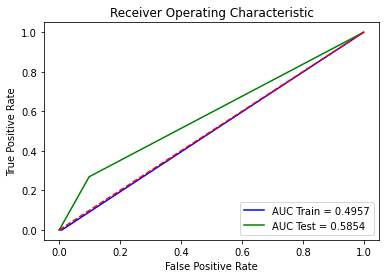

In [99]:
roc_curves_plot(y_train, y_train_predict, y_test, y_test_predict)

In [ ]:
predictfreq1innondation = X_test_predfreq1innondation[:,0]
test_predfreq1innondation = pd.DataFrame(index=test1innondation[TIME_STEPS:].index)
test_predfreq1innondation['pred'] = scaler.inverse_transform(predictfreq1innondation)
test_predfreq1innondation


In [ ]:


import plotly.express as px


fig = px.line(test1innondation, x=test1innondation[TIME_STEPS:].index, y=scaler.inverse_transform(test1innondation[TIME_STEPS:].innondation),title="data vs pred")
#fig.add_scatter(x=test[TIME_STEPS:].index, y=scaler.inverse_transform(test[TIME_STEPS:].nbtweet), mode='lines',name="test",marker_color='rgba(0, 0, 0, .9)')

fig.add_scatter(x=test_predfreq1innondation.index, y=test_predfreq1innondation[TIME_STEPS:].pred, mode='lines',name="pred1",marker_color='rgba(255, 0, 0, .9)')

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

In [ ]:
threshold = []
tpr=[]
fpr=[]
tab_auc_innondation = pd.DataFrame({"threshold": threshold,
                                "tpr":tpr,
                                "fpr":fpr })
tab_auc_innondation

In [ ]:
THRESHOLD = 0.12

test_score_dffreq1innondation = pd.DataFrame(index=test1innondation[TIME_STEPS:].index)
test_score_dffreq1innondation['loss'] = test_mae_lossfreq1innondation
test_score_dffreq1innondation['threshold'] = THRESHOLD
test_score_dffreq1innondation['anomaly'] = test_score_dffreq1innondation.loss > test_score_dffreq1innondation.threshold
test_score_dffreq1innondation['nbtweet'] = test1innondation[TIME_STEPS:].innondation
test_score_dffreq1innondation




import plotly.express as px


fig = px.bar(test_score_dffreq1innondation, x=test_score_dffreq1innondation.index, y="loss")
fig.add_scatter(x=test_score_dffreq1innondation.index, y=test_score_dffreq1innondation['loss'], mode='lines',name="loss",marker_color='rgba(0, 0, 0, .9)')
fig.add_scatter(x=test_score_dffreq1innondation.index, y=test_score_dffreq1innondation['threshold'], mode='lines',name="threshold",marker_color='rgba(255, 0, 0, .9)')
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()



In [ ]:
anomaliesfreq1innondation = test_score_dffreq1innondation[test_score_dffreq1innondation.anomaly == True]
anomaliesfreq1innondation['nbtweet'] = scaler.inverse_transform(anomaliesfreq1innondation['nbtweet'])
anomaliesfreq1innondation.head(2)




import plotly.express as px

fig = px.line(test1innondation, x=test1innondation[TIME_STEPS:].index, y=scaler.inverse_transform(test1innondation[TIME_STEPS:].innondation) )
fig.add_scatter(x=anomaliesfreq1innondation.index, y=anomaliesfreq1innondation.nbtweet, mode='markers',name="anomalies")
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()


